In [72]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
np.version.full_version

'1.17.4'

In [70]:
a = np.array([0,1,2,3,4,5])
print(a)
print(a.ndim)
print(a.shape)
b = a.reshape((3,2))
print(b)
print(b.ndim)
print(b.shape)

[0 1 2 3 4 5]
1
(6,)
[[0 1]
 [2 3]
 [4 5]]


In [73]:
b[1][0] = 77
print(b)
print(a)

[[ 0  1]
 [77  3]
 [ 4  5]]
[ 0  1 77  3  4  5]


In [75]:
c = a.reshape((3,2)).copy()
print(c)
c[0][0] = -99
print(a)
print(c)

[[ 0  1]
 [77  3]
 [ 4  5]]
[ 0  1 77  3  4  5]
[[-99   1]
 [ 77   3]
 [  4   5]]


In [76]:
d = np.array([1,2,3,4,5])
print(d*2)
print(d ** 2)


[ 2  4  6  8 10]
[ 1  4  9 16 25]


In [80]:
a[np.array([2,3,4])]
a > 4

array([False, False,  True, False, False,  True])

In [83]:
a[a>4] = 4
print(a)

[0 1 4 3 4 4]


In [84]:
 a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [85]:
c = np.array([1, 2, np.NAN, 3, 4]) 
print(c)
print(np.isnan(c))
print(c[~np.isnan(c)])
print(np.mean(c[~np.isnan(c)]))

[ 1.  2. nan  3.  4.]
[False False  True False False]
[1. 2. 3. 4.]
2.5


In [86]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))',
 number=10000)
naive_np_sec = timeit.timeit(
 'sum(na*na)',
 setup="import numpy as np; na=np.arange(1000)",
 number=10000)
good_np_sec = timeit.timeit(
 'na.dot(na)',
 setup="import numpy as np; na=np.arange(1000)",
 number=10000)
print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 1.342240 sec
Naive NumPy: 2.165244 sec
Good NumPy: 0.017700 sec


In [87]:
a = np.array([1,2,3])
a.dtype

dtype('int32')

In [88]:
print(np.array([1, "stringy"])) 
print(np.array([1, "stringy", set([1,2,3])]))

['1' 'stringy']
[1 'stringy' {1, 2, 3}]


In [81]:
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [10]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [11]:
print(data.shape)

(743, 2)


In [13]:
x = data[:,0]
y = data[:,1]

In [16]:
 sp.sum(sp.isnan(y))

8

In [17]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

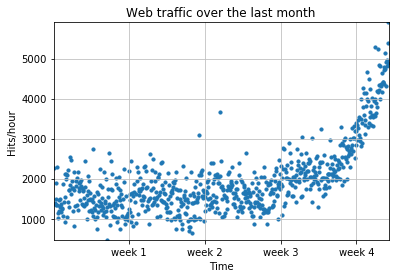

In [40]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.show()


In [30]:
def error(f, x, y):
 return sp.sum((f(x)-y)**2)

In [35]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: {}".format(fp1))
print(residuals)

Model parameters: [  2.59619213 989.02487106]
[3.17389767e+08]


In [36]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.339778


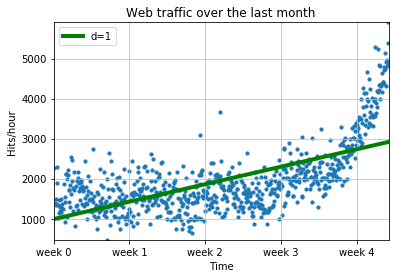

In [47]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4, color='green')
plt.legend(["d=%i" % f1.order], loc="upper left")

In [53]:
f2p = sp.polyfit(x, y, 10)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

[-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
121942326.36358249


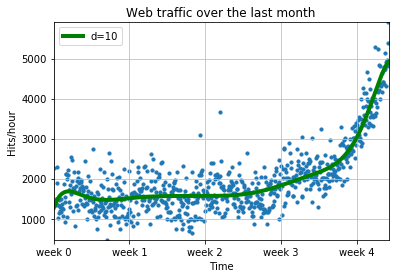

In [54]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000)
plt.plot(fx, f2(fx), linewidth=4, color='green')
plt.legend(["d=%i" % f2.order], loc="upper left")

In [61]:
inflection = int(3.5*7*24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


In [63]:
fbt2 = sp.poly1d(sp.polyfit(xb, yb, 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

fbt2(x)= 
         2
0.07893 x - 84.69 x + 2.437e+04
fbt2(x)-100,000= 
         2
0.07893 x - 84.69 x - 7.563e+04
100,000 hits/hour expected at week 9.837964
